# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sns
from matplotlib import pylab as plt  
from IPython.display import display # Allows the use of display() for DataFrames

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [13,120,390]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,21217,6208,14982,3095,6707,602
1,17160,1200,3412,2417,174,1136
2,3352,1181,1328,5502,311,1000


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [4]:
print "Mean Differences"
display(samples - np.round(data.mean()))
print "Median Differences"
display(samples - np.round(data.median()))

Mean Differences


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9217.0,412.0,7031.0,23.0,3826.0,-923.0
1,5160.0,-4596.0,-4539.0,-655.0,-2707.0,-389.0
2,-8648.0,-4615.0,-6623.0,2430.0,-2570.0,-525.0


Median Differences


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12713.0,2581.0,10226.0,1569.0,5891.0,-364.0
1,8656.0,-2427.0,-1344.0,891.0,-642.0,170.0
2,-5152.0,-2446.0,-3428.0,3976.0,-505.0,34.0


**Answer:**
<p>
The above tables helps compare the samples with the descriptive statistics measures of mean and median of the data. 
<ul>

<li>The first sample establishment buys significantly more `"Fresh"`,`"Grocery"`,and `"Detergent_Paper"` than the mean of the data, it also seems to be larger buyer than the median in all categories of products. Essentially it seems like large buyer of all kinds of products. These numbers suggest that the sample is perhaps a **_Retailer_**.</li>

<li>The second sample establishment buys significantly more `"Fresh"` products and lesser of all the other categories when compared to mean. Further, in comparison to the median it seems to buy more of `"Fresh"`, `"Frozen"` and `"Delicatessen"` products and less of `"Milk"`, `"Grocery"` and `"Detergent_papers"`. Using these observations it seems right to say that this sample is a **_Restarant_**</li>

<li>The third establishment buys more `"Frozen"` goods and lesser of all other products when compared to the mean. The same can be said in comparison with the `"median"` However, the spend on `"delicatessen"` goods is close to the median. These factors are indicative of a small scale **_Caf&eacute;_**.</li>
</ul>
</p>

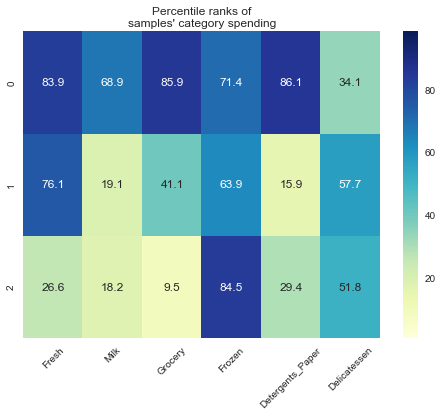

In [5]:
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

# visualize percentiles with heatmap
sns.heatmap(pcts.reset_index(drop=True), annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Percentile ranks of\nsamples\' category spending')
plt.xticks(rotation=45, ha='center');

The heatmap above shows the percentile ranks of samples' category spending. It further helps visualize the amount of spending in each category. This helps us further understand the key categories of spending for each sample. It also confirms that the initial analysis of comparision with the descriptive statistics of the data is correct. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Fresh',axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data,data['Fresh'],test_size=0.25,random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# TODO: Report the score of the prediction using the testing set
regressor.fit(X_train,y_train)
score = regressor.score(X_test,y_test)

print score

-0.385749710204


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
<p>
The Decision tree regressor reported a prediction score of **-0.38** for the `"Fresh"` goods. The negative coefficient of determination implies that there is no relevant information in the other features to replace the information present in `"Fresh"`. Since, it's not possible to predict that a customer will purchase `"Fresh"` goods given the other features it adds relevance to the problem of identifying customer spending habits. Hence, it is a relevant feature that adds new information and cannot be ignored while trying to group customers based on their spending habits.
</p>

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

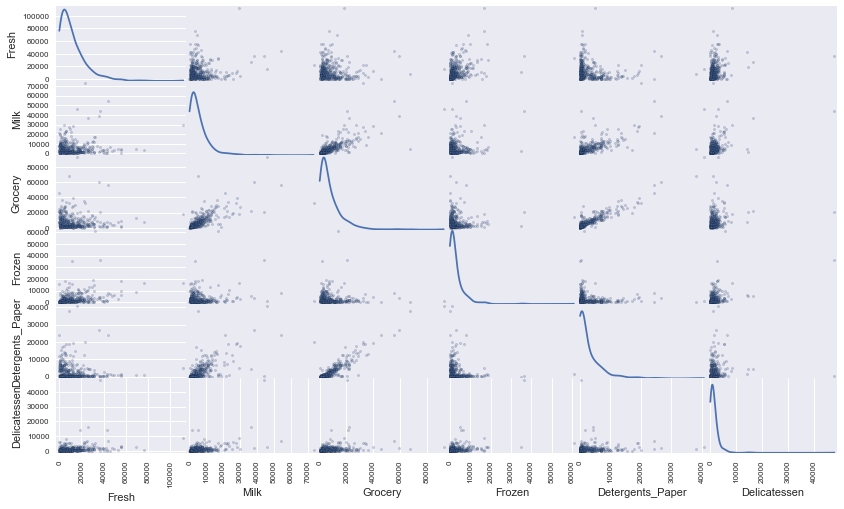

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

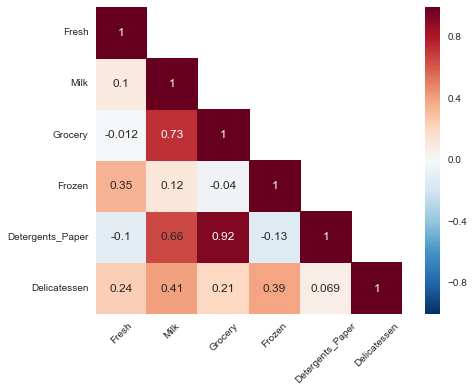

In [8]:
import seaborn as sns
import pylab as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu_r')
    plt.xticks(rotation=45, ha='center');

**Answer:**
<p>
Yes, from the scatter matrix aand heatmap above we can observe that the following pair of features exhibit a greater that 0.5 correlation:
<ol>
<li>`"Milk"` - `"Detergents_Paper"`</li>
<li>`"Milk"` - `"Grocery"`</li>
<li>`"Grocery"` - `"Detergent_Paper"`</li>
</ol>
</p>
<p>
The lack of correlation with other features confirms our hypothesis that the feature `"Fresh"` is relevant in identifying a customer's spending habits. It's not significantly correlated to any if not most of the other features and provides new information to a learning algorithm that is otherwise not present in the other features. Hence it cannot be removed without affecting the performance of a learning algorithm.
</p>
<p>
Most of the data for the features lie in a (right) positively skewed distribution. From the distribution it is quite evident that lower values are more common than higher values. i.e. most customers purchase in the lower monetary units.
</p>

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

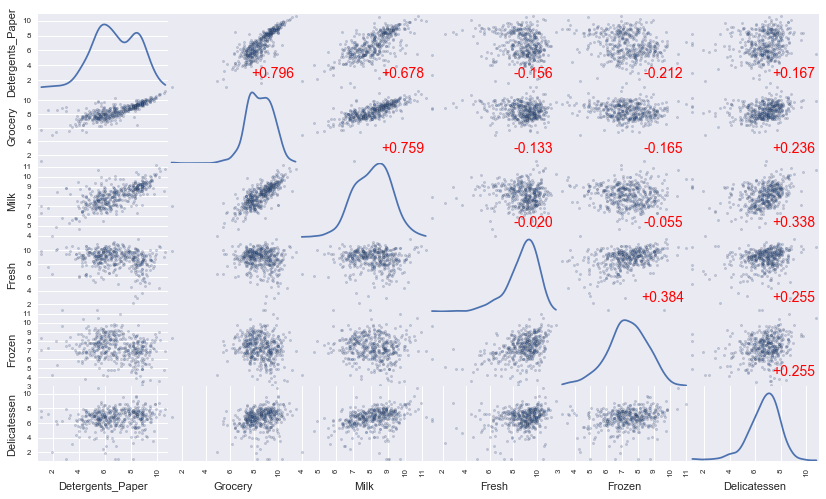

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
idx_reorder = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
axes = pd.scatter_matrix(log_data[idx_reorder], alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = log_data[idx_reorder].corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center',color="red", fontsize=14)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.962558,8.733594,9.614605,8.037543,8.810907,6.400257
1,9.750336,7.090077,8.135054,7.790282,5.159055,7.035269
2,8.117312,7.074117,7.191429,8.612867,5.739793,6.907755


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

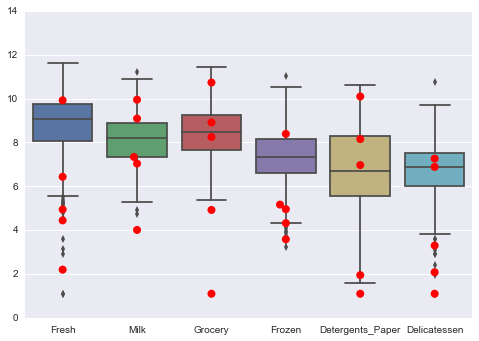

In [11]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],q=25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove [66,95,75,109,128,142,187,218,338]
outliers = [val for sublist in 
            [log_data[~((log_data[feature] >= np.percentile(log_data[feature],q=25) -
                         ((np.percentile(log_data[feature],q=75) -
                           np.percentile(log_data[feature],q=25))*1.5)) &
                        (log_data[feature] <= np.percentile(log_data[feature],q=75) +
                         ((np.percentile(log_data[feature],q=75) -
                           np.percentile(log_data[feature],q=25))*1.5)))].index.values
             for feature in log_data.keys()] for val in sublist]
outliers = list(set([x for x in outliers if outliers.count(x)>1]))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

#visualizing the outliers removed with box-plots.
ax = sns.boxplot(data=log_data)
ax = sns.swarmplot(data=log_data.iloc[outliers], color="red", size=8)

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
<p> Yes, the data points with the indices [128, 65, 66, 75, 154] appear in more than one feature of the dataset. These data points are being removed from the dataset as they are likely to not belong to a segment of customers and might affect the performance of a clustering algorithm. This is because clusering algorithms such as K-Means work to optimize the [**sum of squares**]('http://stackoverflow.com/questions/13989419/removing-outliers-from-a-k-mean-cluster') thus assigning the outliers with more weight and moving the cluster closer toward them.
</p>

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

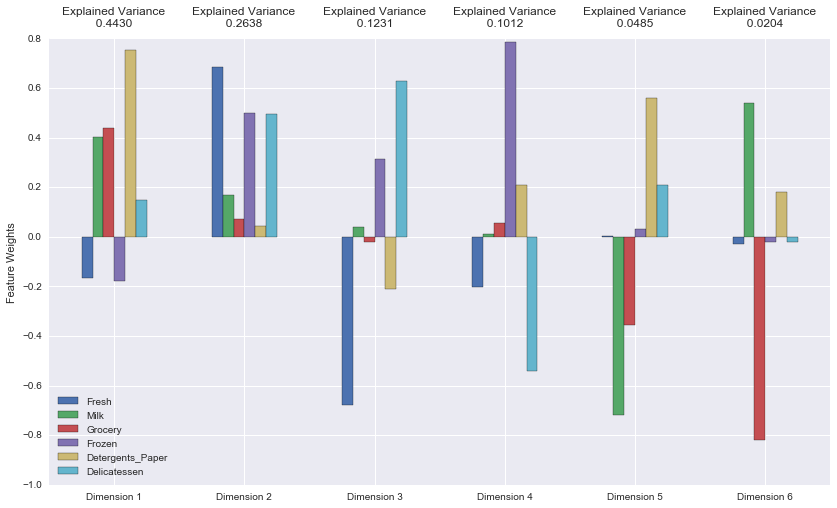

In [12]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
<p>
The first and the second principal components together have an **explained variance ratio** of __0.7093__. This means that together the first and the second principal components contains 70.93% of the variance/information present in the 6 features. Similarly, the first four principal components have a **total explained variance ratio** of __0.9319__ i.e. together the first four principal components explain 93.19% of the variance/information present in the 6 features.
</p>

<p>
PCA helps transform a large set of features to a smaller subset of Principal Components(PCs). It achieves this be performing two important tasks that are as follows:
<dl>
    <dt>By capturing the variance in a feature:</dt> 
        <dd>Variance in data is synonymous to the presence of information from a wide variety of observations/samples. The weights of a feature in the above diagram are representative of the variance in the feature. Thus, larger weights for a feature in a (PC) represents more variance is captured for that feature i.e representative a large range of values in the sample of the feature.
        </dd>
        <dt>By capturing the correlation between features:</dt>
            <dd>As discussed earlier correlation among features represents relationships and patterns among them. The more two features are correlated the more likely it is that they capture similar information. While a strong positive correlation between two features suggests that it's likely for both features to increase or decrease simultaneously a negative correlation would suggest the opposite, i.e one is likely to increase only when the other decreases. In the above diagram the direction of the weights represents the kind of correlation that one feature has with other features.
            </dd>
</dl>
</p>
<ol>**Customer spending profiles**


<li>The first principal component is made up of large positive weights in `"Detergents_Paper"`, and lesser but still sizeable positive weights on `"Grocery"` and `"Milk"`. It also correlates with a nominal decrease in `"Fresh"` and `"Frozen"`. This might represent spending in household staples products that are purchased together.</li>
<li>The second dimension is made of large positive weights on `"Fresh"`,and sizable positive weights on `"Frozen"` and `"Delicatessen"` goods. This could represent the other end of the spectrum of correlated features when compared to the first PC, representing spending on food and related goods.</li>
<li>The third principal component made up of large and nominal negative weights on `"Fresh"` and `"Detergent_papers"` respectively also correlates with a significantly large positive weight from `"Delicatessen"` and a nominal positive weight from the `"Frozen"` goods. This perhaps is representative of a spending pattern that includes large quantities of fresh goods like vegetables and fruits but not on `"frozen"` goods like meat and exotic foods and vice-versa. The key is that the two are mutually exclusive.</li>
<li>The fourth dimension is made up of a large positive and nominal weight on the `"Frozen"` products and `"Detergent_papers"` respectively. It correlates with a sizeable and nominal weights from `"Delicatessen"` and `"Fresh"` goods. It best represents shopping for `"frozen"` goods like meat and not for `"fresh"` and preparable/processed foods at the sametime .</li>
<ol>

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8891,1.3001,-1.1945,0.9689,0.2426,-0.2970
1,-1.9882,0.8101,0.0065,-0.3952,0.0363,-0.6381
2,-1.8639,-0.0061,1.1865,0.7226,0.7035,0.2667


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

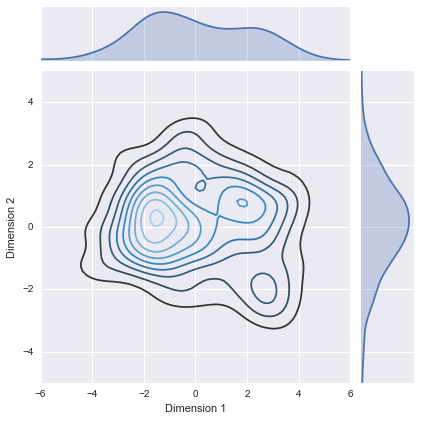

In [16]:
#implement joint Grid to further understand the categories in the two dimensions
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8891,1.3001
1,-1.9882,0.8101
2,-1.8639,-0.0061


### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
<p>The **K-Means** clustering is an algorithm that splits data into **K** distinct groups (clusters). It makes deterministic assignment of data points to clusters, essentially making a hard assignment. It's relatively simple, robust and fast for large feature sets. It gives best results when the data is distinctly separable.</p>
<p>**Gaussian Mixture Model** on the other hand probabilistically determines the **K** subpopulations without associating the samples to a cluster with certainty. Instead, the clusters are defined by gaussian distributions of unknown parameters. Expectation-Maximization is used to learn the parameters. Each sample is hence assigned a probability of belonging to a cluster.</p>

<p>Since, we would like to identify customer segments using clustering it would be simple to use K-Means clustering. However, since we don't want to make hard assumptions about which segment customers belong to and GMM presumes very little about the structure of the data GMM shall be used in this problem</p>

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range (6,1,-1):
    clusterer = GMM(n_components = i,random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print "clusters = {} : score = {:.3f}\n".format(i,score),

clusters = 6 : score = 0.278
clusters = 5 : score = 0.281
clusters = 4 : score = 0.331
clusters = 3 : score = 0.374
clusters = 2 : score = 0.412


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
<p>
The following table records the various clusters and their silhouette scores.
It's evident that using **2 clusters** gives the best silhouette score of **0.412**. This is expected since **reduced_data** is a reduction of the log transformed data to 2 Principal Components.
</p>

<table align="left">
    <caption>Silhouette Scores of various clusters</caption>
    <tr>
        <th>S.No</th>
        <th>n_clusters</th>
        <th>silhouette_score</th>
    </tr>
    <tr>
        <td>1</td>
        <td><b>2</b></td>
        <td><b>0.412</b></td>
    </tr>
    <tr>
        <td>2</td>
        <td>3</td>
        <td>0.374</td>
    </tr>
    <tr>
        <td>3</td>
        <td>4</td>
        <td>0.331</td>
    </tr>
    <tr>
        <td>4</td>
        <td>5</td>
        <td>0.281</td>
    </tr>
    <tr>
        <td>5</td>
        <td>6</td>
        <td>0.278</td>
    </tr>
</table>

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

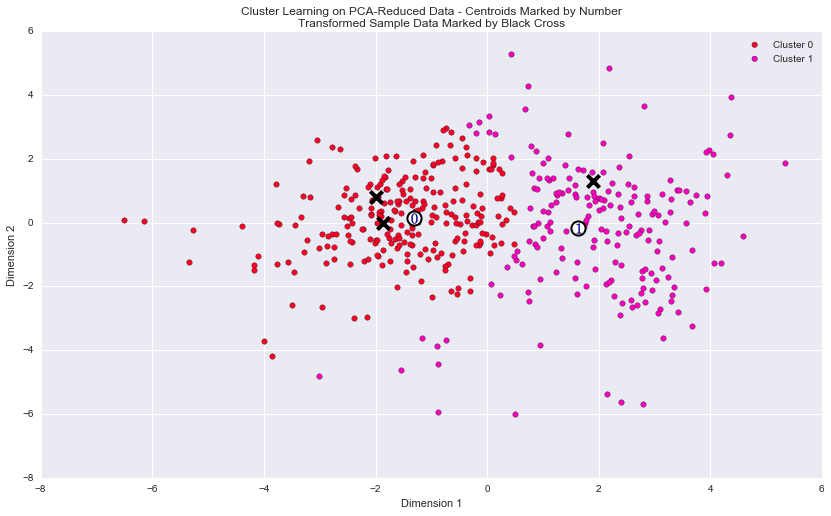

In [19]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [21]:
print "Mean Difference"
display(true_centers - np.round(data.mean()))
print "Median Differences"
display((true_centers - np.round(data.median())))
print "N-stds"
display((true_centers - np.round(data.mean()))/data.std())

Mean Difference


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3188.0,-3744.0,-5262.0,-1014.0,-2544.0,-813.0
Segment 1,-7684.0,551.0,1604.0,-2036.0,165.0,-580.0


Median Differences


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,308.0,-1575.0,-2067.0,532.0,-479.0,-254.0
Segment 1,-4188.0,2720.0,4799.0,-490.0,2230.0,-21.0


N-stds


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-0.252069,-0.507291,-0.553710,-0.208871,-0.533573,-0.288287
Segment 1,-0.607559,0.074657,0.168786,-0.419390,0.034607,-0.205666


**Answer:**
<ol>
<li> In the above table looking at **Segment 0** we can see from the median difference that this segment only majorly corresponds to buyers of larger than the meadian quantity of `"Fresh"` and `"Frozen"` products perhaps a **_Restaurants or Caf&eacute;_**. Although the mean difference table suggests otherwise, a closer look at the lower number of standard deviations the predicted value is from the mean when compared to the values of other features confirms our earlier intuition.</li>
<li>Similarly, **Segment 1** has significantly higher mean and median difference in `"`Milk"`, `"Grocery"` &  `"Detergents_paper"` perhaps representing **_Retailers_** regularly purchasing these goods in larger quantities when compared to the other goods.</li>
</ol>

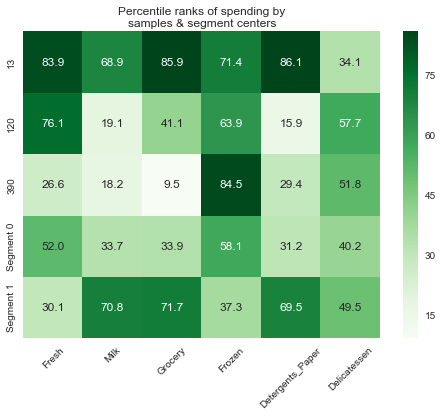

In [22]:
# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
#print ctr_pcts

# visualize percentiles with heatmap and compare to samples (as kept in `pcts` variable)
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
_ = sns.heatmap(pcts.append(ctr_pcts), annot=True, cmap='Greens', fmt='.1f')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of spending by\nsamples & segment centers');

The heatmap above helps visualize the segments alongside the samples. This helps better understand that the sample 1 exhibits characteristics of segment 1 while sample 2 and 3 look like they belong to segment 0.   

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [ ]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

**Answer:**
<p>
The sample point 1 has features `"Milk"` `"Grocery"` and `"Detergents_paper"` with values above the mean and the median. The prediction of the segment according to our initial intuition that sample is likely a **Retailer**
</p>
<p>
The other two sample points have the features `"Fresh"` and `"Frozen"` with values above the mean and all other features with values below the mean. Predicting this as belonging to **Segment 0**, most likely a **Restaurant/Caf&eacute;** again is congruent with our the initial guess and consistent with the characteristics of the Segment. 
</p>

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**
<p>
Since, the intention of A/B test here is to verify the effectiveness of changing the delivery service from 5 days a week to 3 days a week. The wholesaler must be able to explore, experiment and test the strategy without the risk of negatively impacting the entire business. Customers belonging to **Segment 0** are mostly large buyers of fresh products, the new strategy is likely to have a negative impact on this segment since fresh products are purchased more frequently and are perishable.
</p>
<p>
If one were to recommend a group to the distributor purely based on the segments derived above. It would be appropriate for the distributor to conduct the A/B test on **Segment 1**  and test out the effectiveness of the strategy on them. Essentilay split a subset of **Segment 1** customers into "A/control" and "B/treatment" groups to detect a difference without even disturbing the **Segment 0**. This is more likely to not have an negative impact on the customer base. Once proven to have a positive effect a similar A/B test can be performed on **Segement 0** if the need arises. 
</p>

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**
<p>
There exists a pattern in the data that could potentially add value as a feature to a supervised learning algorithm. Specifically, the segments we arrived at using the unsupervised learning methods above. As an input to the supervised learner this new feature *viz.* __"Segment"__ could help it see the patterns that exist in customer segment distinctly and make predictions accordingly. Thus, making more appropriate predictions for each segment.
</p>

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [ ]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
<p>
The number of clusters(2) that was picked based on the **silhouette_score** is exactly the same as the number of classes in the Feature `"Channel"` we had initially excluded from the dataset. Although the number of clusters are the same, the predicted underlying distribution of the clusters differ quite a bit from the original distribution of the feature `"Channel"`.
</p>
<p>
Although, initially it seems like there are distinct customer segments that could be purely classified as `"Retailers"` and `"HoReCa"` a deeper look at the scatter plot above shows that quite a few `"HoReCas"` are in the distribution belonging to the `"Retailers"` segment. Hence, a pure classifcation is possible only with a certain associated error.
</p>
<p>
These classifications are quite consistent with our definition of customer segments. In retrospection choosing GMM over KMeans was a good decision since, it's clear now that hard clustering would have not considered the probability of points from `"HoReCa"` leaking into the `"Retailers"` distribution.